# Logistics Regression,Machine Learning

In [272]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

In [273]:
#Reading DataFrame.
Data=pd.read_csv('Desktop/fyp-data/EEG1.csv')
Data['Activity_Name']=Data['Activity_Name'].str.replace("00_","")
Data['Activity_Name']=Data['Activity_Name'].str.replace(".csv","")
Data['Activity_Name']=Data['Activity_Name'].str.replace(" ","_")
Data.drop(' time',axis=1,inplace=True)
Data.head(10)

,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Activity_Name
0,852296.0,1174005.0,13895.0,31914.0,33515.0,28454.0,30290.0,17683.0,climbing_and_going_down_stairs
1,183511.0,72393.0,40562.0,11919.0,8130.0,12679.0,3455.0,1316.0,climbing_and_going_down_stairs
2,842776.0,93302.0,40989.0,11661.0,5804.0,7385.0,11691.0,2240.0,climbing_and_going_down_stairs
3,73942.0,49816.0,471.0,7239.0,12778.0,2654.0,1752.0,611.0,climbing_and_going_down_stairs
4,75131.0,40052.0,40111.0,15599.0,71537.0,7763.0,5259.0,1198.0,climbing_and_going_down_stairs
5,189991.0,152211.0,41250.0,25150.0,25560.0,17781.0,5577.0,2019.0,climbing_and_going_down_stairs
6,1113565.0,229653.0,109451.0,83274.0,161981.0,38280.0,19900.0,7469.0,climbing_and_going_down_stairs
7,552368.0,256357.0,111059.0,43850.0,10993.0,30575.0,8952.0,2795.0,climbing_and_going_down_stairs
8,430940.0,184523.0,20613.0,48664.0,42567.0,45209.0,7670.0,6908.0,climbing_and_going_down_stairs
9,320319.0,193565.0,52896.0,15682.0,55345.0,15021.0,10386.0,8412.0,climbing_and_going_down_stairs


In [274]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0    Delta         447 non-null    float64
 1    Theta         447 non-null    float64
 2    Alpha1        447 non-null    float64
 3    Alpha2        447 non-null    float64
 4    Beta1         447 non-null    float64
 5    Beta2         447 non-null    float64
 6    Gamma1        447 non-null    float64
 7    Gamma2        447 non-null    float64
 8   Activity_Name  447 non-null    object 
dtypes: float64(8), object(1)
memory usage: 31.6+ KB


In [275]:
Data['Activity_Name'].unique()

array(['climbing_and_going_down_stairs', 'playing_music_game', 'sitting',
       'walk', nan], dtype=object)

In [276]:
Data.isnull().sum()

 Delta           1
 Theta           1
 Alpha1          1
 Alpha2          1
 Beta1           1
 Beta2           1
 Gamma1          1
 Gamma2          1
Activity_Name    1
dtype: int64

In [277]:
Data.dropna(inplace=True)

In [278]:
Data.isnull().sum()

 Delta           0
 Theta           0
 Alpha1          0
 Alpha2          0
 Beta1           0
 Beta2           0
 Gamma1          0
 Gamma2          0
Activity_Name    0
dtype: int64

In [279]:
LabelEncoder = preprocessing.LabelEncoder()

In [280]:
Data['Activity_Name'] = LabelEncoder.fit_transform(Data['Activity_Name'].astype(str))

In [281]:
X = Data.drop(['Activity_Name'],axis=1)
Y = Data['Activity_Name']
Data['Activity_Name'].unique()

array([0, 1, 2, 3])

In [282]:
m=len(X)
m

447

In [283]:
X.shape

(447, 8)

In [284]:
#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)

In [285]:
standard_scaler = preprocessing.StandardScaler()
X = standard_scaler.fit_transform(X)

# Independent Variable X

In [286]:
X

array([[ 0.706433  ,  5.58214157, -0.36293352, ...,  0.22960968,
         1.40644614,  2.6278816 ],
       [-0.50100661, -0.2634066 ,  0.18860505, ..., -0.16702791,
        -0.49839096, -0.65670731],
       [ 0.68924537, -0.15245595,  0.19743645, ..., -0.30013722,
         0.08622757, -0.47127564],
       ...,
       [-0.41425064, -0.49981018, -0.61335648, ..., -0.47176627,
        -0.6989898 , -0.80722003],
       [-0.80045041, -0.06875876, -0.25863199, ...,  0.23157087,
        -0.28096909, -0.39220629],
       [-0.63499245, -0.30543296, -0.27364744, ..., -0.36782333,
        -0.67570727, -0.77792022]])

# Dependent Variable Y

In [287]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
442    3
443    3
444    3
445    3
446    3
Name: Activity_Name, Length: 447, dtype: int32

In [288]:
Model=LogisticRegression()

In [289]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 446
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0    Delta         447 non-null    float64
 1    Theta         447 non-null    float64
 2    Alpha1        447 non-null    float64
 3    Alpha2        447 non-null    float64
 4    Beta1         447 non-null    float64
 5    Beta2         447 non-null    float64
 6    Gamma1        447 non-null    float64
 7    Gamma2        447 non-null    float64
 8   Activity_Name  447 non-null    int32  
dtypes: float64(8), int32(1)
memory usage: 33.2 KB


<AxesSubplot:>

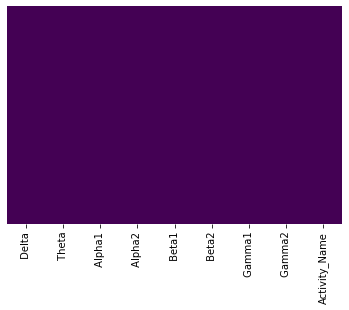

In [290]:
sns.heatmap(Data.isnull(),yticklabels=False,cmap='viridis',cbar=False)

<AxesSubplot:>

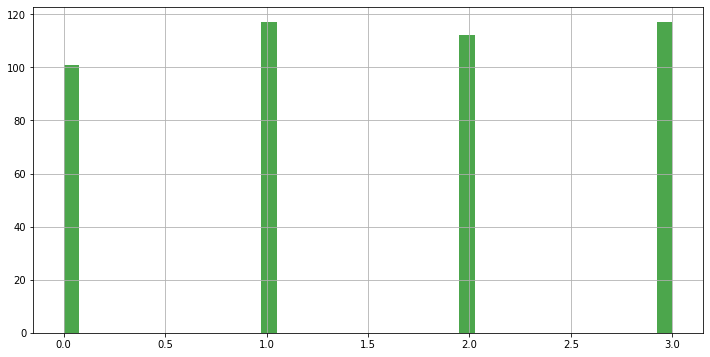

In [291]:
Data['Activity_Name'].hist(bins=40,color="green",alpha=0.7,figsize=(12,6))

c:\users\grace\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


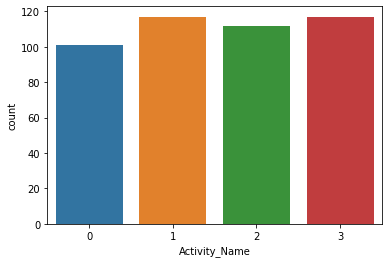

In [292]:
sns.countplot(Data['Activity_Name'],label="count")
plt.show()

In [293]:
from matplotlib import cm

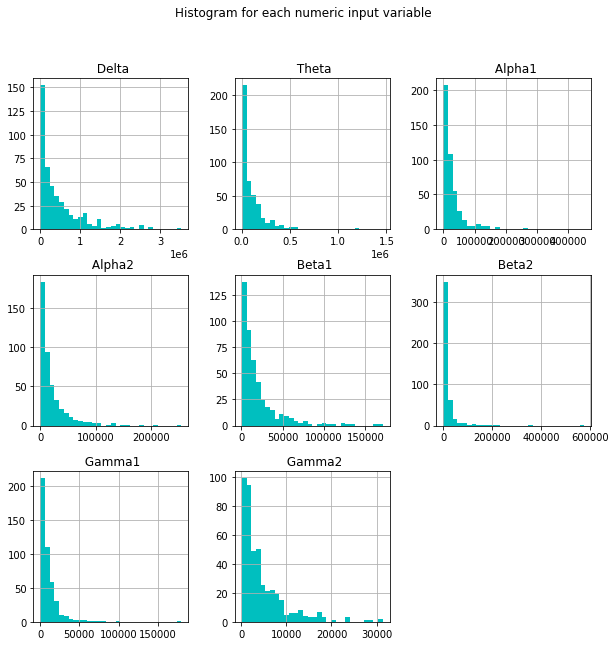

In [294]:
import pylab as pl

# To create a histogram, we will use pandas hist() method.
Data.drop('Activity_Name', axis=1).hist(bins=30, figsize=(10,10), color = "c")
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('Data_histogram')
plt.show()

In [295]:
np.any(np.isnan(X))

False

In [296]:
np.all(np.isfinite(X))

True

In [297]:
X.shape

(447, 8)

In [298]:
Y.shape

(447,)

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [300]:
fitting=Model.fit(X_train,y_train)

In [301]:
Y_prediction=Model.predict(X_test)

In [302]:
Y_prediction

array([2, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 0, 1, 1, 0,
       3, 0, 1, 1, 0, 2, 2, 1, 3, 1, 0, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 3,
       1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1,
       1, 3, 1, 3, 3, 1, 2, 2, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0,
       1, 2])

# Accuracy of Model=Logistic Regression

In [303]:
acc_score = round(accuracy_score(y_test, Y_prediction)*100,2)
print(acc_score,'% Accuracy')

38.89 % Accuracy


# Support Vector Machine, SVM

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
from sklearn import svm

In [306]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [307]:
X_train

array([[-0.7135825 , -0.48805659, -0.19662604, ..., -0.41790905,
        -0.50634109, -0.47047291],
       [-0.50319659, -0.54289781, -0.43052373, ..., -0.02177432,
        -0.50726388, -0.73517461],
       [-0.59167494, -0.47527358, -0.58938553, ..., -0.07284063,
         0.07295369, -0.18891378],
       ...,
       [-0.66752797, -0.46279833, -0.51130933, ..., -0.42173085,
        -0.58108652, -0.73958965],
       [-0.2073492 , -0.58722182, -0.60098838, ..., -0.07565669,
        -0.56405053, -0.59951248],
       [-0.37033373,  0.06069516, -0.16460963, ...,  0.36508248,
         0.10801945, -0.13071553]])

In [308]:
y_train

234    2
432    3
356    3
59     0
65     0
      ..
297    2
296    2
249    2
56     0
262    2
Name: Activity_Name, Length: 357, dtype: int32

In [309]:
model=svm.SVC()

In [310]:
model.fit(X_train,y_train)

SVC()

In [311]:
prediction=model.predict(X_test)
prediction

array([0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 3, 0, 1, 2, 1, 1, 3, 1, 1, 0, 1, 0,
       1, 1, 0, 2, 2, 1, 1, 1, 0, 3, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 3, 1, 3, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0])

In [312]:
y_test

322    2
427    3
212    1
267    2
171    1
      ..
443    3
182    1
240    2
388    3
36     0
Name: Activity_Name, Length: 90, dtype: int32

# Accuracy of Model SVM=Support Vector Machine

In [313]:
acc_score = round(accuracy_score(y_test, prediction)*100,2)
print(acc_score,'% Accuracy')

27.78 % Accuracy


# Random Forest, Machine Learning

In [314]:
from sklearn.neighbors import KNeighborsClassifier

In [315]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [316]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

# Accuracy on training Data

In [317]:
KNN.score(X_train,y_train)*100

59.943977591036415

# Accuracy on Testing Data

In [318]:
KNN.score(X_test,y_test)*100

30.0

# Navie Bayes, Machine Learning Model